# Import Libraries

In [90]:
# classification algorithms
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# model accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import SCORERS

# data structures
import numpy as np
import pandas as pd
import json

# data viz and other
import random
import matplotlib.pyplot as plt

# nlp stack
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings

from sklearn.externals import joblib

from lib.Functions import *

In [91]:
random.seed(17) # For reproducibility 
warnings.filterwarnings('ignore')

# Data Import

In [92]:
from nltk.corpus import gutenberg   # Docs from project gutenberg.org   
text_0 = nltk.corpus.gutenberg.raw('austen-emma.txt')
text_1 = nltk.corpus.gutenberg.raw('blake-poems.txt')
text_2 = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt')
text_3 = nltk.corpus.gutenberg.raw('carroll-alice.txt')
text_4 = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

# Pre-processing
- Tokenization
- Word Stemming/Lemmatization
- Remove stop words

In [94]:
austen = create_select_para(stem_lem_words(tokenize(text_0)))
blake = create_select_para(stem_lem_words(tokenize(text_1)),para_size=160)
shakespeare = create_select_para(stem_lem_words(tokenize(text_2)))
carroll = create_select_para(stem_lem_words(tokenize(text_3)))
melville = create_select_para(stem_lem_words(tokenize(text_4)))

In [95]:
training_data = austen + blake + shakespeare + carroll + melville
# Convert to Data Frame and label the columns
label_data = pd.DataFrame(["austen"] * len(austen) + ["blake"] * len(blake) + ["shakespeare"] * len(shakespeare) + ["carroll"] * len(carroll) + ["melville"] * len(melville))
label_data.columns = ['target_value']

# Transform & Feature Engineering

### Next step is converting the text (paragraphs) into numerical feature vectors. BOW and TF-IDF and Combined

### BOW

In [97]:
c_vectorizer = CountVectorizer(max_features=1000,ngram_range=(1, 2)) # top 1000 words and bigrams
fit_c_vectorizer = c_vectorizer.fit(training_data)

# Output a pickle file for the vectorizer
#joblib.dump(fit_c_vectorizer, 'vectorizers/count_vectorizer.pkl')# c_vectorizer = joblib.load('pickles/count_vectorizer.pkl')
texts_count_vectorized = pd.DataFrame(c_vectorizer.fit_transform(training_data).toarray())
texts_count_vectorized.columns = c_vectorizer.get_feature_names()
texts_count_vectorized.head(2)

,able,account,acquaintance,across,added,affection,afraid,afterwards,againe,age,...,wrath,write,written,wrong,ye,year,yes,yet,young,youth
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0


### TF-IDF

In [98]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1, 2))
fit_tfidf_vectorizer = tfidf_vectorizer.fit(training_data)

# Output a pickle file for the vectorizer
#joblib.dump(fit_tfidf_vectorizer, 'vectorizers/tfidf_vectorizer.pkl')
texts_tfidf_vectorized = pd.DataFrame(tfidf_vectorizer.fit_transform(training_data).toarray())
texts_tfidf_vectorized.columns = tfidf_vectorizer.get_feature_names()
texts_tfidf_vectorized.head(2)

,able,account,acquaintance,across,added,affection,afraid,afterwards,againe,age,...,wrath,write,written,wrong,ye,year,yes,yet,young,youth
0,0.0,0.100227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.137225,0.0,0.044733,0.0,0.0


Add the target variable to the feature vector

In [99]:
#Add BOW and TF-IDF
df = pd.concat([texts_count_vectorized,texts_tfidf_vectorized, label_data], axis=1)

In [100]:
df = df.sample(frac=1,random_state=17)
df.head(5)

,able,account,acquaintance,across,added,affection,afraid,afterwards,againe,age,...,write,written,wrong,ye,year,yes,yet,young,youth,target_value
786,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,carroll
499,0,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.06793,0.045468,0.0,0.0,shakespeare
930,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,melville
217,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,blake
803,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,melville


Split data from labels

In [101]:
y = df['target_value'].values
X = df.iloc[:, :-1]

# K-Nearest Neighbor

Determine the K

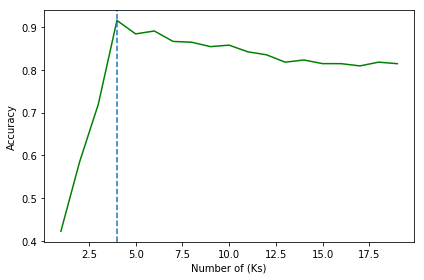

In [301]:
Ks = 20
accuracy_Ks = []
for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors = n)
    # Fit with cross validation
    accuracy_Ks.append(np.mean(cross_val_score(knn, X, y, cv=6)))

# plot results
plt.plot(range(1,Ks),accuracy_Ks,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of (Ks)')
plt.axvline(x=4,linestyle='dashed')
plt.tight_layout()
plt.show()

In [302]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_score = cross_validate(knn_model, X, y, cv=10,return_train_score=True)

# Decision Tree

In [102]:
dt_model = DecisionTreeClassifier(random_state=17)
dt_score = cross_validate(dt_model, X, y, cv=10,return_train_score=True)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [104]:
dt_score2 = dt_model.fit(X_train, y_train)

In [105]:
res = dt_score2.predict(X_test)

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, res))

              precision    recall  f1-score   support

      austen       0.97      1.00      0.98        56
       blake       0.93      1.00      0.96        63
     carroll       1.00      0.97      0.98        66
    melville       0.98      0.88      0.93        58
 shakespeare       0.97      0.98      0.97        57

   micro avg       0.97      0.97      0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



The biggest issue is with the text written by "blake". The low values in precision indicate that we predicted that it was blake but it wasn't and the low value of recall indicate that we predicted it wasn't blake (someone else) but it was actually blake. Next, to see with who it confused it with, I will look at the confusion matrix.

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test, res,labels=["austen", "blake", "carroll","melville","shakespeare"])

array([[56,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0],
       [ 0,  1, 64,  1,  0],
       [ 2,  3,  0, 51,  2],
       [ 0,  1,  0,  0, 56]])

In [21]:
confusion_matrix(y_test, res,labels=["austen", "blake", "carroll","melville","shakespeare"])

array([[55,  1,  0,  0,  0],
       [ 0, 63,  0,  0,  0],
       [ 0,  0, 65,  1,  0],
       [ 3,  4,  0, 51,  0],
       [ 0,  1,  0,  1, 55]])

So they are ordered. This means that out of the 8 text of blake, it got 5 correct. Thats not good! It predicted 2 times that it was blake when it was actually shakespeare. And the other was the model predicted it was shakespeare, but it was actually blake. I think this is because the model doesn't have enough information about blake to be able to identify it.

# SVM

In [34]:
# Additional preprocessing
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)

In [305]:
svm_model = svm.SVC(gamma='scale', decision_function_shape='ovo',random_state=17)
svm_score = cross_validate(svm_model, X, y, cv=10,return_train_score=True)

# Multi Layer Perceptron

In [306]:
# source: https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

# adjust the hyperparameters
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X, y)

/Users/justincharbonneau/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [310]:
print('Best parameters found:\n', clf.best_params_)
# all are default except the learning_Rate. let's try this one.

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [110]:
mlp_model = MLPClassifier(random_state=10, learning_rate='adaptive',activation='tanh')
mlp_score = cross_validate(mlp_model, X, y, cv=10,return_train_score=True)

In [111]:
mlp_score['test_score']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

# Results

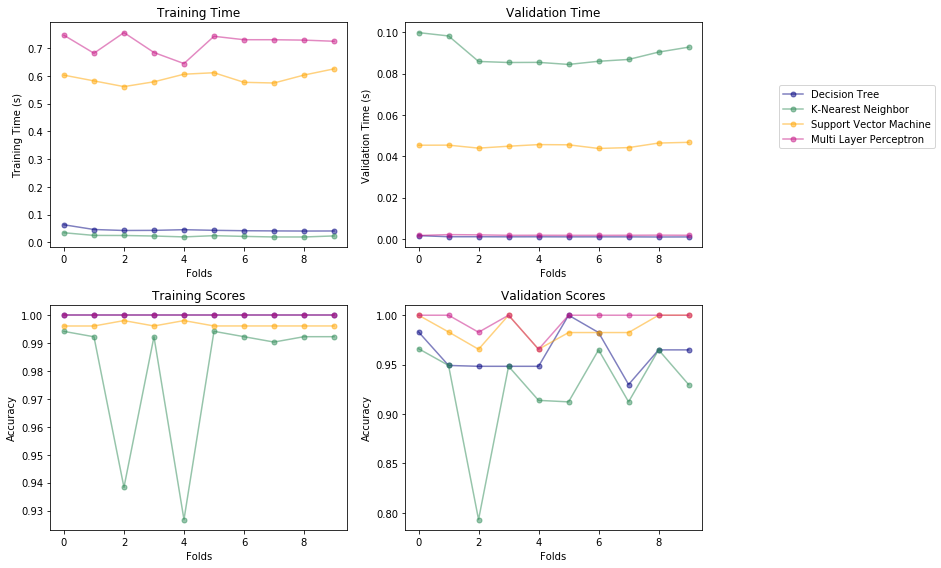

In [318]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.figure(1,figsize=(10,8))
plt.subplot(221)
plt.plot(range(0,10),dt_score['fit_time'],label='Decision Tree',marker='o', markerfacecolor='navy', markersize=5, color='navy', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),knn_score['fit_time'],label='K-Nearest Neighbor',marker='o', markerfacecolor='seagreen', markersize=5, color='seagreen', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),svm_score['fit_time'],label='Support Vector Machine',marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),mlp_score['fit_time'],label='Multi Layer Perceptron',marker='o', markerfacecolor='mediumvioletred', markersize=5, color='mediumvioletred', linewidth=1.5, alpha=0.5)
plt.ylabel('Training Time (s)')
plt.xlabel('Folds')
plt.title('Training Time')

plt.subplot(222)
plt.plot(range(0,10),dt_score['score_time'],label='Decision Tree',marker='o', markerfacecolor='navy', markersize=5, color='navy', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),knn_score['score_time'],label='K-Nearest Neighbor',marker='o', markerfacecolor='seagreen', markersize=5, color='seagreen', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),svm_score['score_time'],label='Support Vector Machine',marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),mlp_score['score_time'],label='Multi Layer Perceptron',marker='o', markerfacecolor='mediumvioletred', markersize=5, color='mediumvioletred', linewidth=1.5, alpha=0.5)
plt.ylabel('Validation Time (s)')
plt.xlabel('Folds')
plt.title('Validation Time')

plt.subplot(223)
plt.plot(range(0,10),dt_score['train_score'],label='Decision Tree',marker='o', markerfacecolor='navy', markersize=5, color='navy', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),knn_score['train_score'],label='K-Nearest Neighbor',marker='o', markerfacecolor='seagreen', markersize=5, color='seagreen', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),svm_score['train_score'],label='Support Vector Machine',marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),mlp_score['train_score'],label='Multi Layer Perceptron',marker='o', markerfacecolor='mediumvioletred', markersize=5, color='mediumvioletred', linewidth=1.5, alpha=0.5)
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.title('Training Scores')

plt.subplot(224)
plt.plot(range(0,10),dt_score['test_score'],label='Decision Tree',marker='o', markerfacecolor='navy', markersize=5, color='navy', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),knn_score['test_score'],label='K-Nearest Neighbor',marker='o', markerfacecolor='seagreen', markersize=5, color='seagreen', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),svm_score['test_score'],label='Support Vector Machine',marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=1.5, alpha=0.5)
plt.plot(range(0,10),mlp_score['test_score'],label='Multi Layer Perceptron',marker='o', markerfacecolor='mediumvioletred', markersize=5, color='mediumvioletred', linewidth=1.5, alpha=0.5)
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.title('Validation Scores')

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.8, 2))

plt.show()

In [317]:
print("Decision Tree:",np.mean(dt_score['test_score']))
print("K-Nearest Neighbor:",np.mean(knn_score['test_score']))
print("Support Vector Machine:",np.mean(svm_score['test_score']))
print("Multi Layer Perceptron:",np.mean(mlp_score['test_score']))

Decision Tree: 0.9619136239195301
K-Nearest Neighbor: 0.9254637177397029
Support Vector Machine: 0.9861453751268879
Multi Layer Perceptron: 0.9948275862068966


In [343]:
# Output a pickle file for the model
fit_mlp_model = mlp_model.fit(X,y)
joblib.dump(fit_mlp_model, 'models/mlp_model.pkl')

['models/mlp_model.pkl']

In [320]:
# Load the pickle file
clf_load = joblib.load('models/mlp_model.pkl')

In [447]:
u_in = input("Enter your sentence : ")

Enter your sentence : shine,\n and he knew that it was mine, --\n \n And into my garden stole\n When the night had veiled the pole;\n In the morning, glad, I see\n My foe outstretched beneath the tree.\n \n \n A LITTLE BOY LOST\n \n "Nought loves another as itself,\n   Nor venerates another so,\n Nor is it possible to thought\n   A greater than itself to know.\n \n "And, father, how can I love you \n   Or any of my brothers more?\n I love you like the little bird\n   That picks up crumbs around the door."\n \n The Priest sat by and heard the child;\n   In trembling zeal he seized his hair,\n He led him by his little coat,\n   And all admired the priestly care. \n \n And standing on the altar high,\n   "Lo, what a fiend is here! said he:\n "One who sets reason up for judge\n   Of our most holy mystery."\n \n The weeping child could not be heard,\n   The weeping parents wept in vain:\n They stripped him to his little shirt,\n   And bound him in an iron chain,\n \n And burned him in a hol

In [448]:
user_input = select_random_para(create_para(stem_lem_words(tokenize(u_in))))
user_input

['shine n knew mine n n garden stole n night veiled pole n morning glad see n foe outstretched beneath tree n n n little boy lost n n nought love another n venerates another n possible thought n greater know n n father love n brother n love like little bird n pick crumb around door n n priest sat heard child n trembling zeal seized hair n led little coat n admired priestly care n n standing altar high n lo fiend said n one set reason judge n holy mystery n n weeping child could heard n weeping parent wept vain n stripped little shirt n bound iron chain n n burned holy place n many burned n weeping parent wept vain n thing done albion shore n n n little girl lost n n child future age n reading indignant page n know former']

In [449]:
texts_count_vectorized = pd.DataFrame(c_vectorizer.transform(user_input).toarray())

In [468]:
svd.transform(texts_count_vectorized)

array([[ 4.44536605e-02,  4.09213095e-02,  5.53459242e-03,
        -6.26876886e-02,  1.99737721e-02,  2.39071018e-02,
         4.70178895e-02,  5.19849064e-02,  6.76878134e-03,
         2.51812486e-02, -2.10932408e-02,  3.50923240e-02,
        -7.63730972e-03, -4.59579517e-03,  3.00132801e-02,
        -1.82309567e-02,  3.10861564e-02, -9.33635479e-02,
        -1.83885211e-02,  2.44535557e-02, -4.84804676e-04,
        -1.74433779e-02,  1.22754443e-02,  2.33651255e-02,
         1.18066710e-01,  7.69491568e-02,  1.25185116e-02,
         3.79463829e-02,  3.26982212e-02, -4.69175550e-02,
         4.32839396e-02,  1.30880644e-01,  1.39462244e-01,
        -9.10786228e-02,  7.98691178e-02, -7.28197770e-02,
        -1.10617749e-02, -3.87284578e-02, -1.02410762e-01,
        -6.01648619e-02,  1.82341914e-01,  8.02704991e-02,
        -5.39940465e-02, -8.84390762e-02,  2.97316613e-02,
         7.25824236e-02,  3.06279590e-02, -4.36429263e-02,
         9.83107399e-02, -1.08612613e-01, -5.69399918e-0

In [451]:
clf_load.predict(texts_count_vectorized)

array(['blake-poems'], dtype=object)

# Error Analysis